<a href="https://colab.research.google.com/github/royadeh/Pytorch_samples/blob/main/test_models_objectnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import package

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler
import os
import time
import copy

ObjectNet Dataset to test some pretrained models

In [2]:
#!gdown https://drive.google.com/drive/folders/1QWNdxCw6bnECyeaPTZt84MVM16wfqufR?usp=sharing

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DataLoader

In [3]:

#dataloader
def get_dataloaders(data, batch_size=80, shuffle=True):
    '''
    returns dataloader
    '''
   
    test_data_transform = transforms.Compose([transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

    data_dir= data
    image_test_dataset=datasets.ImageFolder(data,transform=test_data_transform)
    test_dataloader=torch.utils.data.DataLoader(image_test_dataset,batch_size=batch_size,shuffle=shuffle)
    test_dataset_size=len(image_test_dataset)
    print("size",test_dataset_size)

    return test_dataloader


data= '/content/drive/MyDrive/objectNet'

test_dataloader=get_dataloaders(data, batch_size=20, shuffle=False)




size 451


show one batch of images

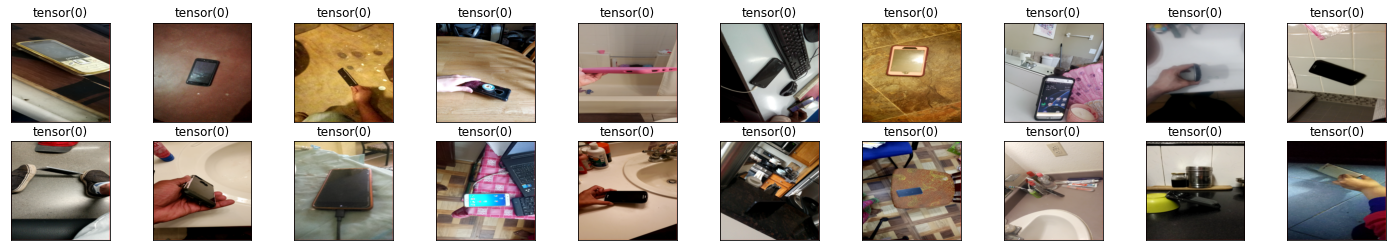

In [4]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image


def show_databatch(inputs, classes):
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
      ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
      plt.imshow(im_convert(inputs[idx]))
      ax.set_title(classes[classes[idx].item()])
classes = ('cellphone', 'chair')
# Get a batch of training data
inputs, classes = next(iter(test_dataloader))
show_databatch(inputs, classes)







pretrained models

In [5]:
def alexnet_model():
  model=models.alexnet(pretrained=True)

  return model

def resnet50_model():
  model = models.resnet50(pretrained=True)
  return model

def vgg16_model():
  model=models.vgg16(pretrained=True)
  return model

test the model

In [6]:
def test_model(model):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

  test_running_loss_history = []
  test_running_corrects_history = []

  test_running_loss = 0.0
  test_running_corrects = 0.0
     
  with torch.no_grad():
        for test_inputs, test_labels in test_dataloader:
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          
          _, test_preds = torch.max(test_outputs, 1)

          test_running_loss += test_loss.item()
          test_running_corrects += torch.sum(test_preds == test_labels.data)
      
  print('test loss: {:.4f}, validation acc {:.4f} '.format(test_running_loss, test_running_corrects.item()))
  return  test_running_corrects

pretrained_alexnet=alexnet_model()
test_running_corrects_history_alexnet=test_model(pretrained_alexnet)

pretrained_vgg16=vgg16_model()
test_running_corrects_history_vgg16=test_model(pretrained_vgg16)

pretrained_resnet50=resnet50_model()
test_running_corrects_history_resnet50=test_model(pretrained_resnet50)



Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

test loss: 0.5977, validation acc 0.0000 


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

test loss: 0.6725, validation acc 0.0000 


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

test loss: 0.4726, validation acc 0.0000 
